**Problem Statement:**

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, and they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. As a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which bookings are going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


**Data Description:**
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

**Data Dictionary:**
- Booking_ID: the unique identifier of each booking
-no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- - Not Selected – No meal plan selected
- - Meal Plan 1 – Breakfast
- - Meal Plan 2 – Half board (breakfast and one other meal)
- - Meal Plan 3 – Full board (breakfast, lunch, and dinner)
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.

**Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, recall_score, precision_score, confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
data = pd.read_csv("/content/INNHotelsGroup.csv")

In [ ]:
df = data.copy()

In [ ]:
print(df.columns.tolist())

['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.shape

(36275, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Booking_ID,36275,36275,INN36275,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [ ]:
#df['market_segment_type'].value_counts()

In [ ]:
#df['type_of_meal_plan'].value_counts()

In [ ]:
#df['room_type_reserved'].value_counts(ascending=False)

### **EXPLORATORY DATA ANALYSIS**

**UNIVARIATE ANALYSIS**

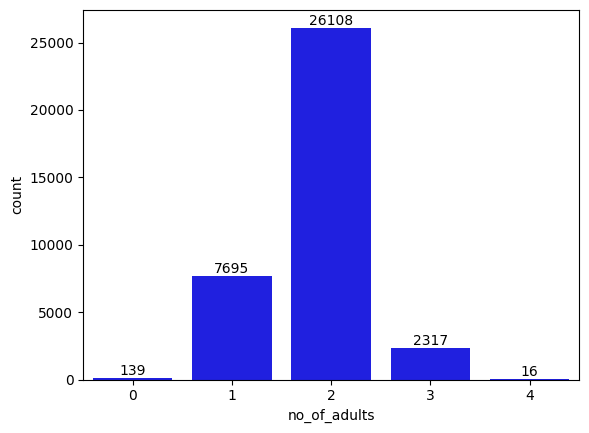

In [ ]:
# NUMBER OF ADULTS
adult = sns.countplot(df, x = 'no_of_adults', color = 'Blue');
for container in adult.containers:
    adult.bar_label(container, fmt='%d', label_type='edge')      # Display integer counts

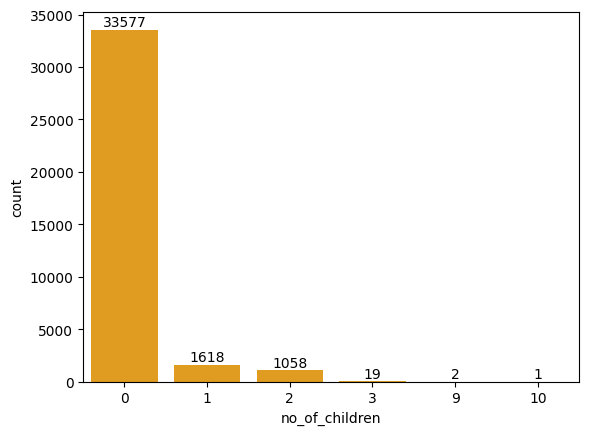

In [ ]:
# NUMBER OF CHILDREN
child = sns.countplot(df, x = 'no_of_children', color = 'Orange');
for container in child.containers:
    child.bar_label(container, fmt='%d', label_type='edge')

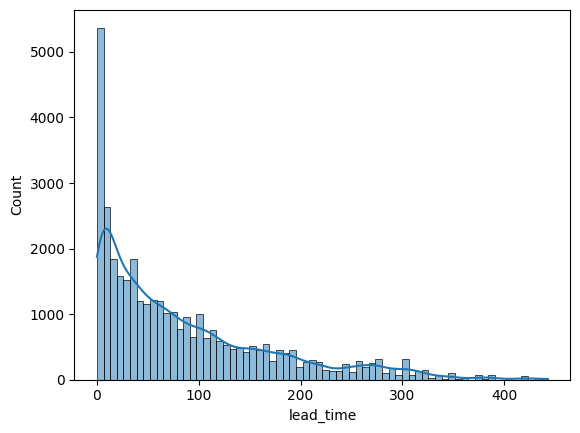

In [ ]:
# LEAD TIME
sns.histplot(df, x = 'lead_time', kde = True);

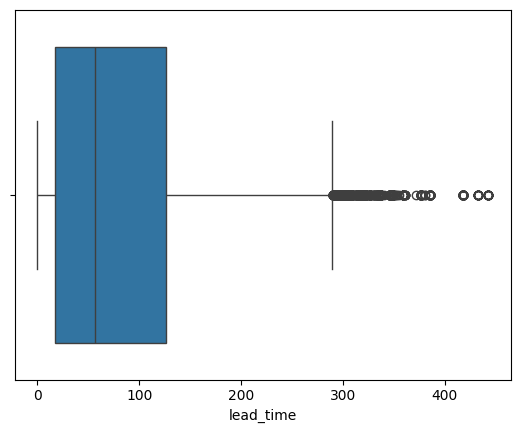

In [ ]:
sns.boxplot(df, x = 'lead_time');

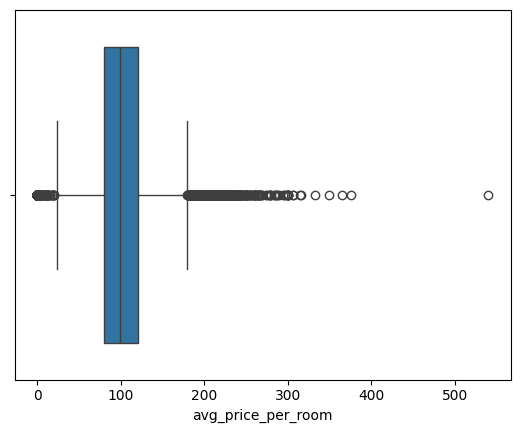

In [ ]:
# AVERAGE PRICE PER ROOM
sns.boxplot(df, x = 'avg_price_per_room');

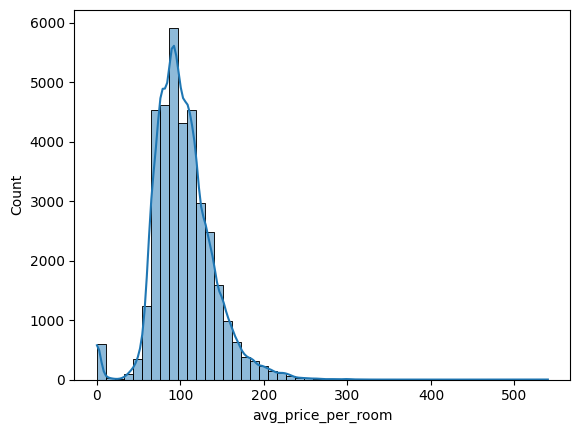

In [ ]:
sns.histplot(df, x = 'avg_price_per_room', bins = 50, kde = True);

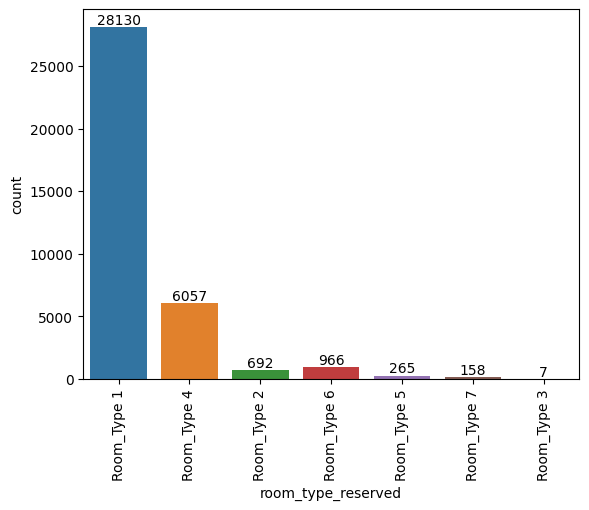

In [ ]:
# TYPE OF ROOM
roomtype = sns.countplot(df, x = 'room_type_reserved', hue = 'room_type_reserved', legend = False);
for container in roomtype.containers:
    roomtype.bar_label(container, fmt='%d', label_type='edge')
plt.xticks(rotation=90)
plt.show()

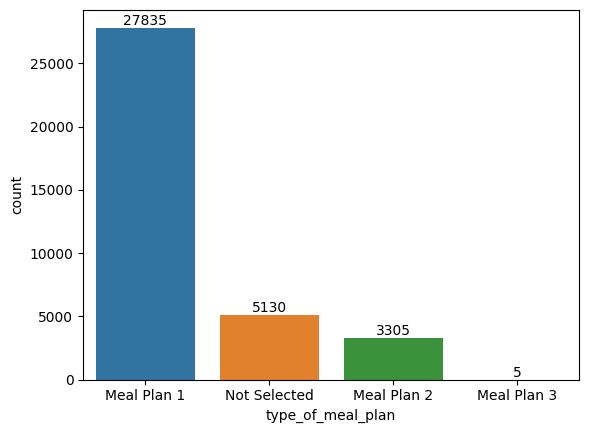

In [ ]:
# MEAL PLAN
meal = sns.countplot(df, x = 'type_of_meal_plan', hue = 'type_of_meal_plan', legend = False);
for container in meal.containers:
    meal.bar_label(container, fmt='%d', label_type='edge')

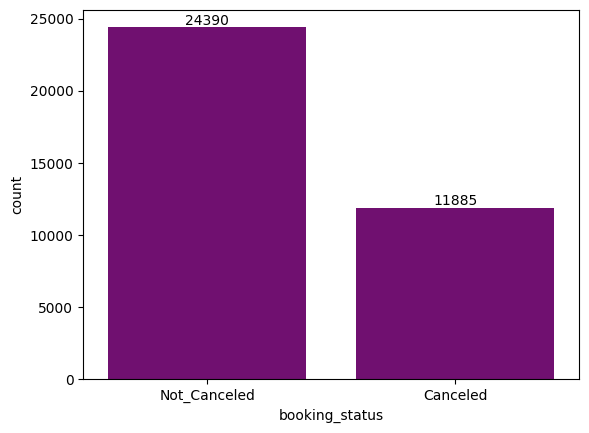

In [ ]:
# BOOKING STATUS
book = sns.countplot(df, x = 'booking_status', color = 'purple');
for container in book.containers:
    book.bar_label(container, fmt='%d', label_type='edge')

**BIVARIATE ANALYSIS**

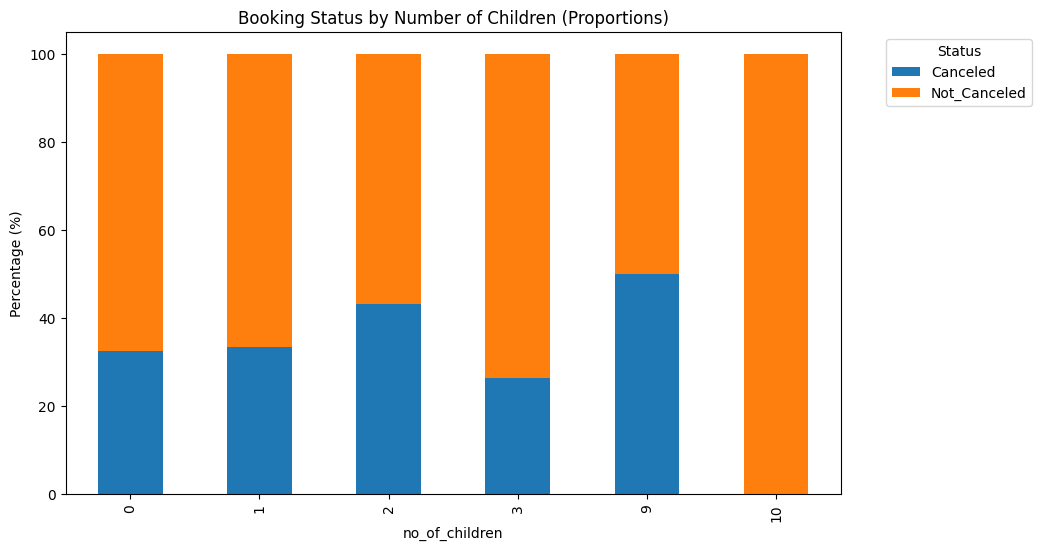

In [ ]:
# NUMBER OF CHILDREN VS BOOKING STATUS
# Calculate proportions
cross_tab = pd.crosstab(df['no_of_children'], df['booking_status'], normalize='index') * 100
# Plot
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel("Percentage (%)")
plt.title("Booking Status by Number of Children (Proportions)")
plt.legend(title="Status", bbox_to_anchor=(1.05, 1))
plt.show()

**Observations:**
- Approximately 33% of bookings with 0 children are canceled.
- Approximately 35% of bookings with 1 children are canceled.
- We can observe that 75% of bookings with 3 children are not canceled.
- 50 % of bookings with 9 children are canceled.

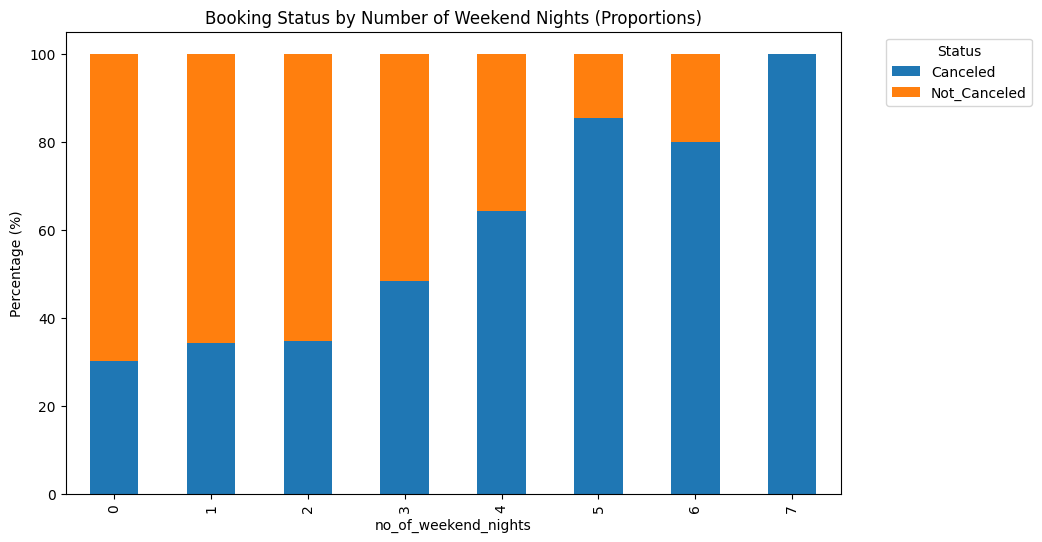

In [ ]:
# NUMBER OF WEEKEND NIGHTS VS BOOKING STATUS
cross_tab1 = pd.crosstab(df['no_of_weekend_nights'], df['booking_status'], normalize = 'index') * 100
cross_tab1.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel("Percentage (%)")
plt.title("Booking Status by Number of Weekend Nights (Proportions)")
plt.legend(title="Status", bbox_to_anchor=(1.05, 1))
plt.show()

**Observation:**
- There is an upward trend in number of bookings being canceled with increase in number of weekend nights from 0 to 5.

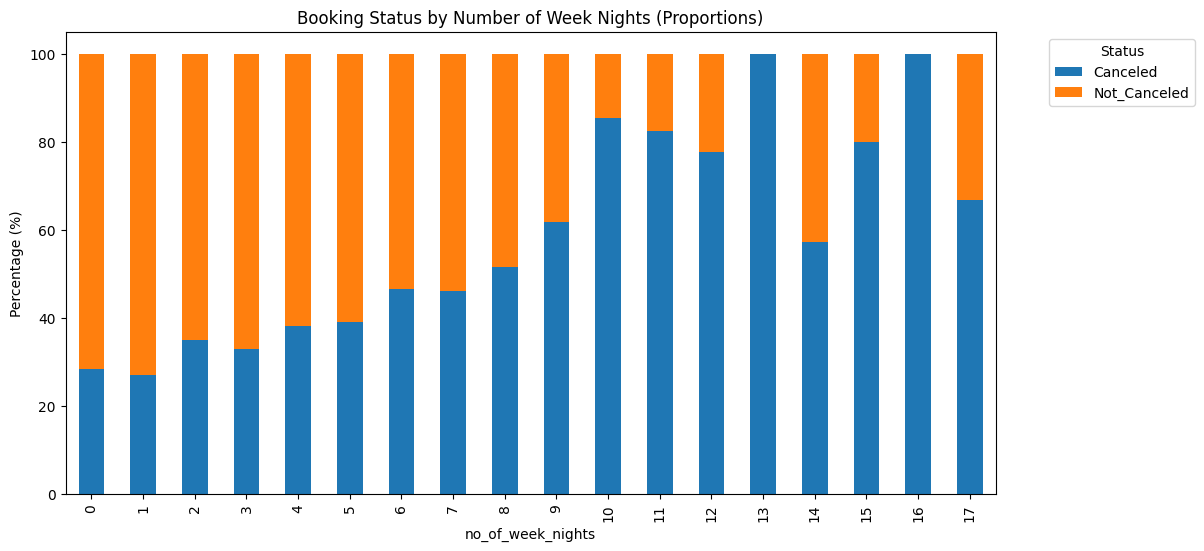

In [ ]:
# NUMBER OF WEEK DAYS VS BOOKING STATUS
cross_tab1 = pd.crosstab(df['no_of_week_nights'], df['booking_status'], normalize = 'index') * 100
cross_tab1.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.ylabel("Percentage (%)")
plt.title("Booking Status by Number of Week Nights (Proportions)")
plt.legend(title="Status", bbox_to_anchor=(1.05, 1))
plt.show()

**Observations:**
-

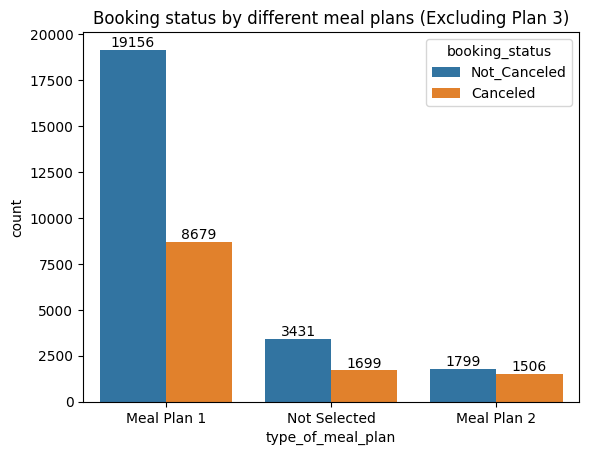

In [ ]:
# TYPE OF MEAL PLAN VS BOOKING STATUS
df_filtered = df[df['type_of_meal_plan'].isin(['Meal Plan 1', 'Meal Plan 2', 'Not Selected'])]
ax = sns.countplot(df_filtered, x = 'type_of_meal_plan', hue = 'booking_status');
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.title("Booking status by different meal plans (Excluding Plan 3)")
plt.show()

**Observations:**
- Most number of bookings have opted for meal plan 1, cancellation percentage is also very less when  compared to other meal plans.
- As number of bookings who have opted meal plan 3 is very less which is 5 it is ok to remove it for better visualisation.
- Below is the crosstable to support the claim putforth.
- Meal Plan 1 has the lowest cancellation rate (31.2) vs meal plan 2
 (40.0) and not selected (45.0).  

In [ ]:
# CROSS TABULATION OF MEAL PLAN AND BOOKING STATUS
pd.crosstab(df['booking_status'], df['type_of_meal_plan'])

type_of_meal_plan,Meal Plan 1,Meal Plan 2,Meal Plan 3,Not Selected
booking_status,,,,
Canceled,8679,1506,1,1699
Not_Canceled,19156,1799,4,3431


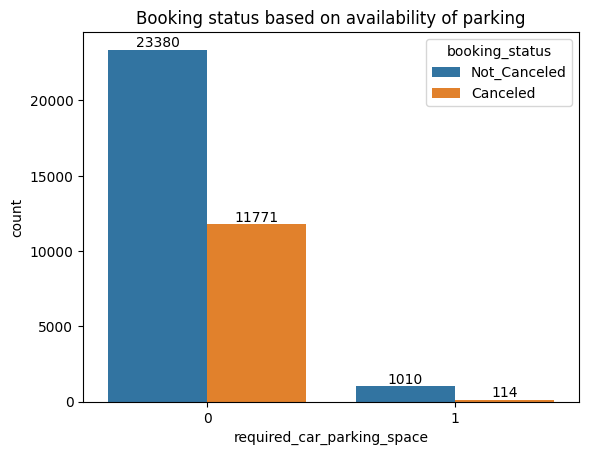

In [ ]:
# CAR PARKING SPACE VS BOOKING STATUS
space = sns.countplot(df, x = 'required_car_parking_space', hue = 'booking_status');
for container in space.containers:
    space.bar_label(container, fmt='%d', label_type='edge')
plt.title("Booking status based on availability of parking")
plt.show()

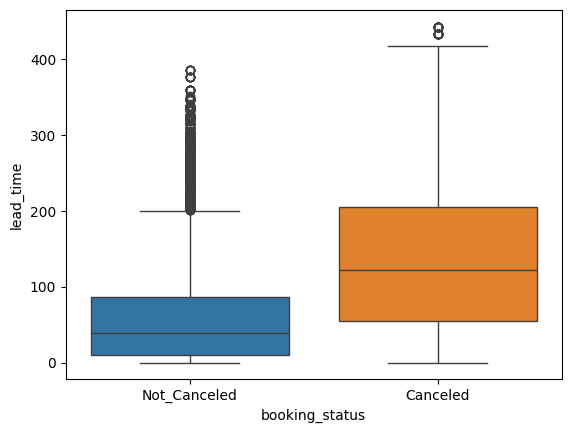

In [ ]:
# LEAD TIME VS BOOKING STATUS
sns.boxplot(df, x = 'booking_status', y = 'lead_time', hue = 'booking_status', legend = False);

**Observations:**
- Median lead time for booking status for not canceled bookings is approximately 40 days.
- There are many non canceled bookings which were booked more than 200 days prior of the arrival.

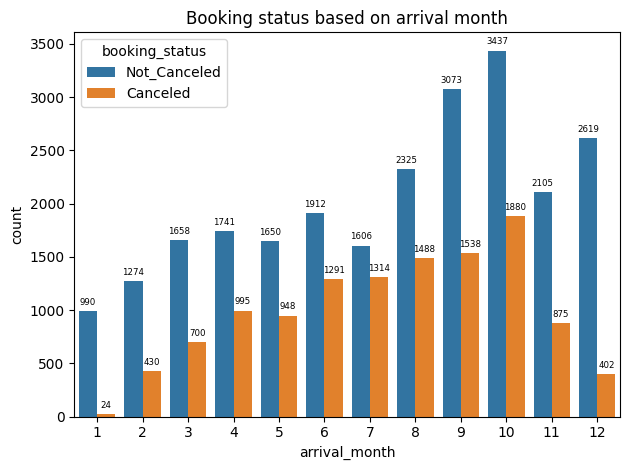

In [ ]:
# ARRIVAL MONTH VS BOOKING STATUS
arr = sns.countplot(df, x = 'arrival_month', hue = 'booking_status');
for container in arr.containers:
    arr.bar_label(container, fmt='%d', label_type='edge', padding = 3, fontsize = 6.20)
plt.title("Booking status based on arrival month")
plt.tight_layout()
plt.show()

**Observations:**
- Most number of bookings were in the later part of the year i.e from July(7) to December(12).
- The highest number of bookings are in October and least number of bookings are in January.
- Bookings peak in October, reaching the highest count (~3437 non-canceled and ~1538 canceled), indicating a strong seasonal demand in Q4.
- The number of cancellations rises steadily from March to November, peaking in October and November.
- Higher demand months does not guarantee lower cancellation rates.


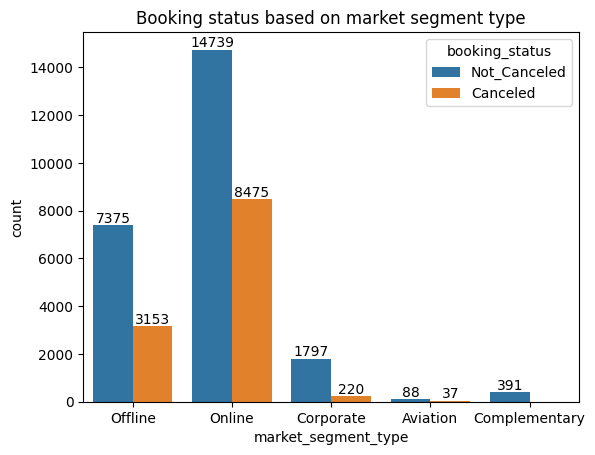

In [ ]:
# MARKET SEGMENT TYPE VS BOOKING STATUS
mar = sns.countplot(df, x = 'market_segment_type', hue = 'booking_status');
for container in mar.containers:
    mar.bar_label(container, fmt='%d', label_type='edge')
plt.title("Booking status based on market segment type")
plt.show()

**Observations:**
- Most of the bookings are done online in which more than 50 percent of bookings are canceled.
- Offline bookings are second most in which 42.5 percent of bookings are canceled.  
- Corporate, Aviation and Complementary constitute to very few bookings combined.

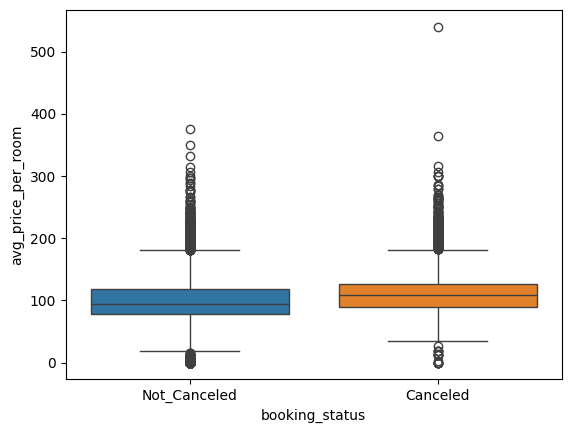

In [ ]:
# AVERAGE PRICE PER ROOM VS BOOKING STATUS
sns.boxplot(df, x = 'booking_status', y = 'avg_price_per_room', hue = 'booking_status');

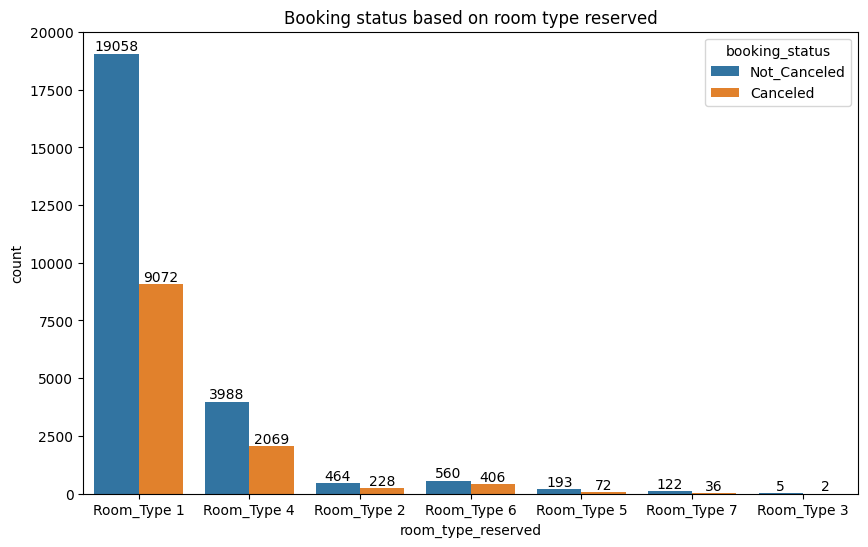

In [ ]:
# ROOM TYPE RESERVED VS BOOKING STATUS
plt.figure(figsize = (10,6))
room = sns.countplot(df, x = 'room_type_reserved', hue = 'booking_status');
for container in room.containers:
    room.bar_label(container, fmt='%d', label_type='edge')
plt.title("Booking status based on room type reserved")
plt.show()

Observation:
- Out of all the room types, room type 1 is prefered by most of the people as it has more than 28,000 bookings.
- Second most preferred room is room type 4 with more than 6000 bookings.
- Highest booking cancelations are of room type 1 with 9072 cancelations out of 28,130 bookings.
- Room type 7 has least percentage of cancelations which is 22.78.  

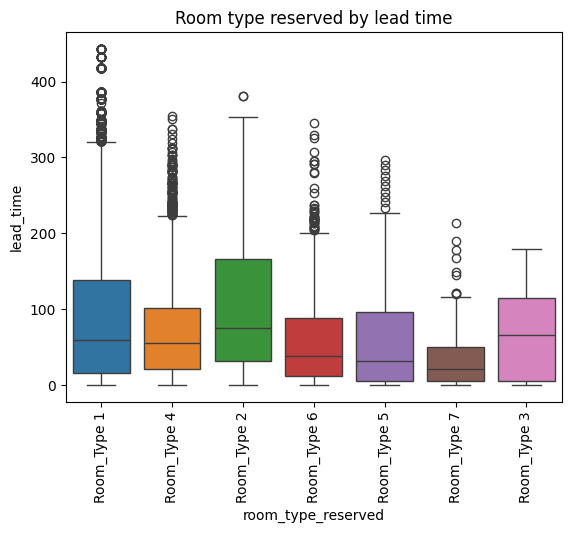

In [ ]:
# ROOM TYPE RESERVED VS LEAD TIME
sns.boxplot(df, x = 'room_type_reserved', y = 'lead_time', hue = 'room_type_reserved');
plt.title("Room type reserved by lead time")
plt.xticks(rotation = 90)
plt.show()

**Observations:**
- There is no strong or consistent relationship between lead time and the type of room reserved.
- Room type 1, room type 4 and room type 6 stand out because of high number of outliers.
- If we specially consider room type 1 we can see that few rooms have been reserved more than 400 days back indicating its uniqueness and advance planning for this room.
- Room type 7 seems to be the last minute stay for many as it is booked closer to the check-in date.

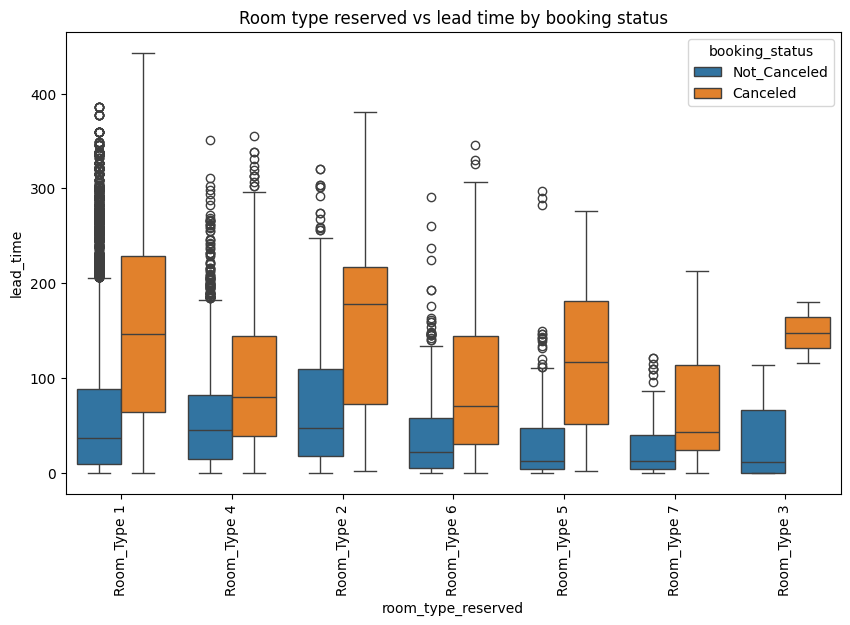

In [ ]:
# ROOM TYPE RESERVED VS LEAD TIME VS BOOKING STATUS
plt.figure(figsize = (10,6))
sns.boxplot(df, x = 'room_type_reserved', y = 'lead_time', hue = 'booking_status');
plt.title("Room type reserved vs lead time by booking status")
plt.xticks(rotation = 90)
plt.show()

**EDA QUESTIONS**

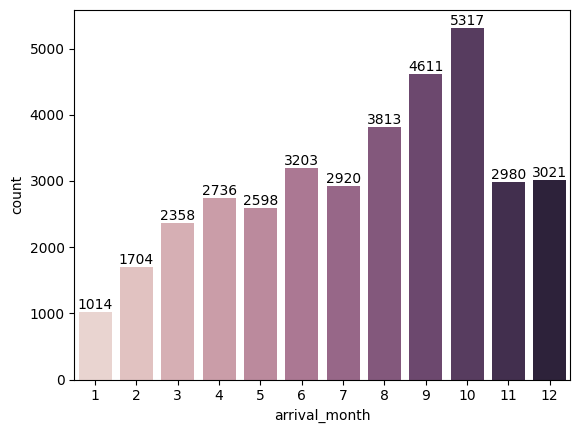

In [ ]:
# 1) WHAT ARE THE BUSIEST MONTHS IN THE HOTEL?
month = sns.countplot(df, x = 'arrival_month', hue = 'arrival_month', legend = False);
for container in month.containers:
    month.bar_label(container, fmt='%d', label_type='edge')

**Observation:** August, September and October are the most busiest months in the ascending order of the number of arrivals.

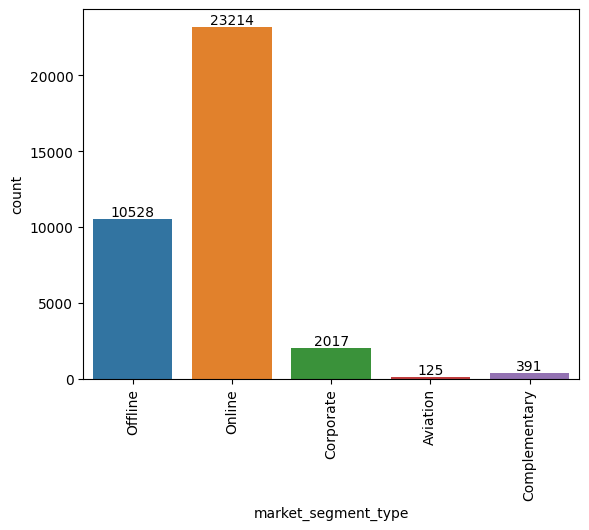

In [ ]:
# 2) WHICH MARKET SEGMENT DO MOST OF THE GUESTS COME FROM?
mar = sns.countplot(df, x = 'market_segment_type', hue = 'market_segment_type', legend = False);
for container in mar.containers:
    mar.bar_label(container, fmt='%d', label_type='edge')
plt.xticks(rotation=90)
plt.show()

**Observation:** Most of the bookings are from online market segment.

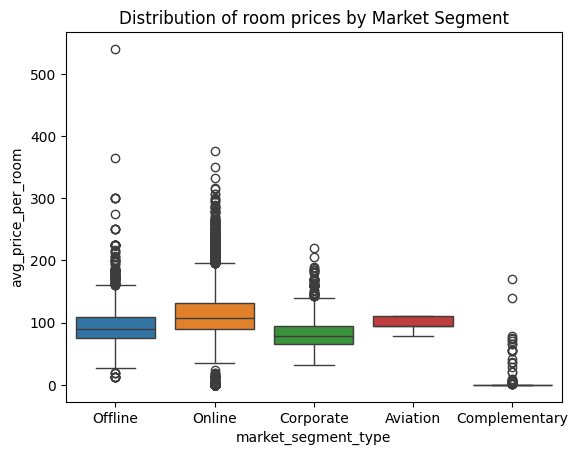

In [ ]:
# 3) HOTEL RATES ARE DYNAMIC AND CHANGE ACCORDING TO DEMAND AND CUSTOMER DEMOGRAPHICS. WHAT ARE THE DIFFERENCES IN ROOM PRICES IN DIFFERENT MARKET SEGMENTS?
sns.boxplot(df, x = 'market_segment_type', y = 'avg_price_per_room', hue = 'market_segment_type', legend = False);
plt.title("Distribution of room prices by Market Segment")
plt.show()

**Observations:**
- Distribution of prices of online bookings is a bit more when compared to other market segments.
- Out of 5 market segments four market segments have outliers.  
- Aviation segemnt has least amount of price variablity.


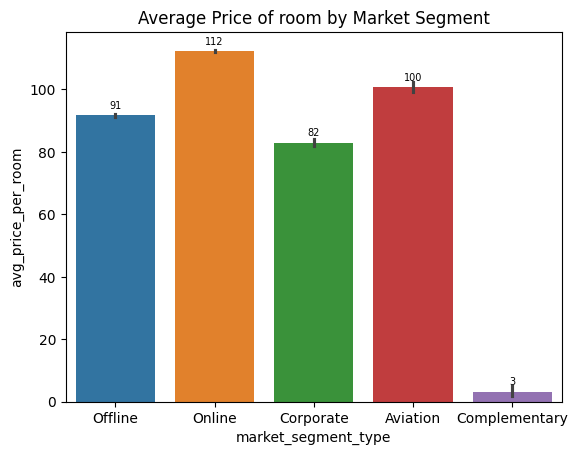

In [ ]:
typee = sns.barplot(df, x = 'market_segment_type', y = 'avg_price_per_room', hue = 'market_segment_type');
for container in typee.containers:
    typee.bar_label(container, fmt='%d', label_type='edge', padding = 3.5, fontsize = 7)
plt.title("Average Price of room by Market Segment")
plt.show()

Observations:
- From the barplot we can infer that average price per room of online bookings is higher which is approximately 112.
- Bookings under Aviation segemnt have second highest mean average price per room.
- Despite less number of bookings under aviation segment i.e is 125 there average price per room is high which says that they want to stay in good rooms.

booking_status
Not_Canceled    67.236389
Canceled        32.763611
Name: proportion, dtype: float64


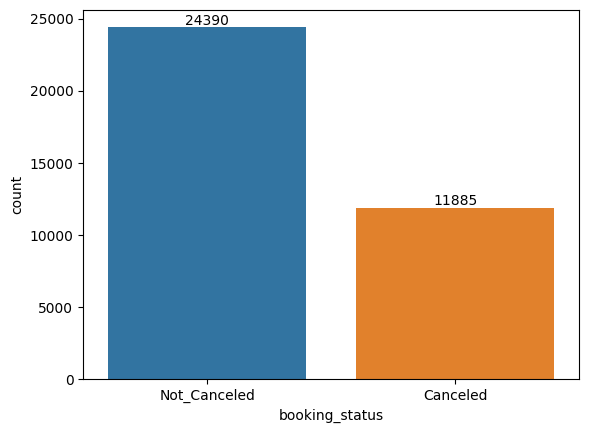

In [ ]:
# 4) WHAT PERCENTAGE OF BOOKINGS ARE CANCELED?
stat = sns.countplot(df, x = 'booking_status', hue = 'booking_status');
for container in stat.containers:
    stat.bar_label(container, fmt='%d', label_type='edge')
status_percentages = df['booking_status'].value_counts(normalize=True) * 100
print(status_percentages)

**Observation:** Percentage of bookings canceled are 32.76.

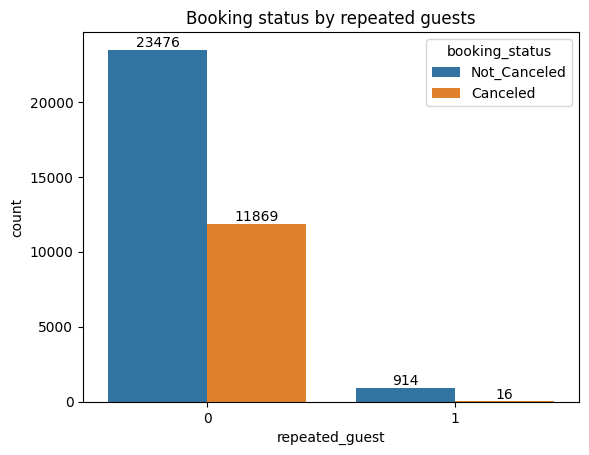

In [ ]:
# 5) WHAT PERCENTAGE OF REPEATING GUESTS CANCEL?
rep_guests = sns.countplot(df, x = 'repeated_guest', hue = 'booking_status');
for container in rep_guests.containers:
    rep_guests.bar_label(container, fmt='%d', label_type='edge')
plt.title("Booking status by repeated guests")
plt.show()

**Observation:** Only 1.7 percent of repeated guests cancel their booking.

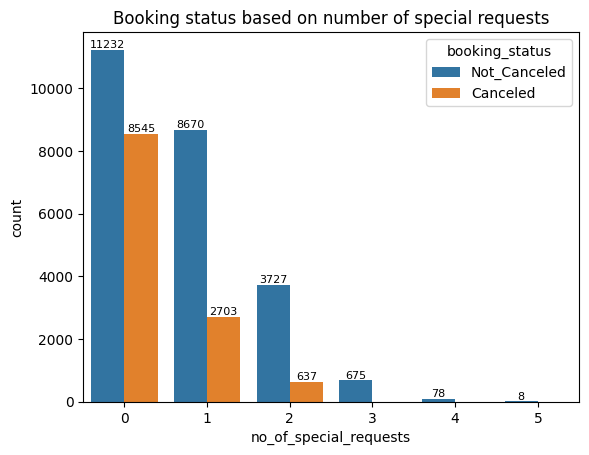

In [ ]:
# 6) DO SPECIAL REQUIREMENTS AFFECT BOOKING CANCELLATION?
req = sns.countplot(df, x = 'no_of_special_requests', hue = 'booking_status');
for container in req.containers:
    req.bar_label(container, fmt='%d', label_type='edge', fontsize = 8)
plt.title("Booking status based on number of special requests")
plt.show()

**Observations:**
- Most of the bookings constitute upto three special requests.
- We could observe that bookings with 3 and more than 3 special requests have zero cancelations.
- Bookings with zero special requests have seen more than 43.2 percent cancelations.
- Bookings with 2 special requests have seen approximately 14.6 percent cancelations in bookings.

In [ ]:
df['type_of_meal_plan'].value_counts()

,count
type_of_meal_plan,
Meal Plan 1,27835
Not Selected,5130
Meal Plan 2,3305
Meal Plan 3,5


### **DATA PREPROCESSING**

In [ ]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


There are no missing values in the given data

In [ ]:
df.duplicated().sum()

np.int64(0)

There are no duplicate rows in the given data

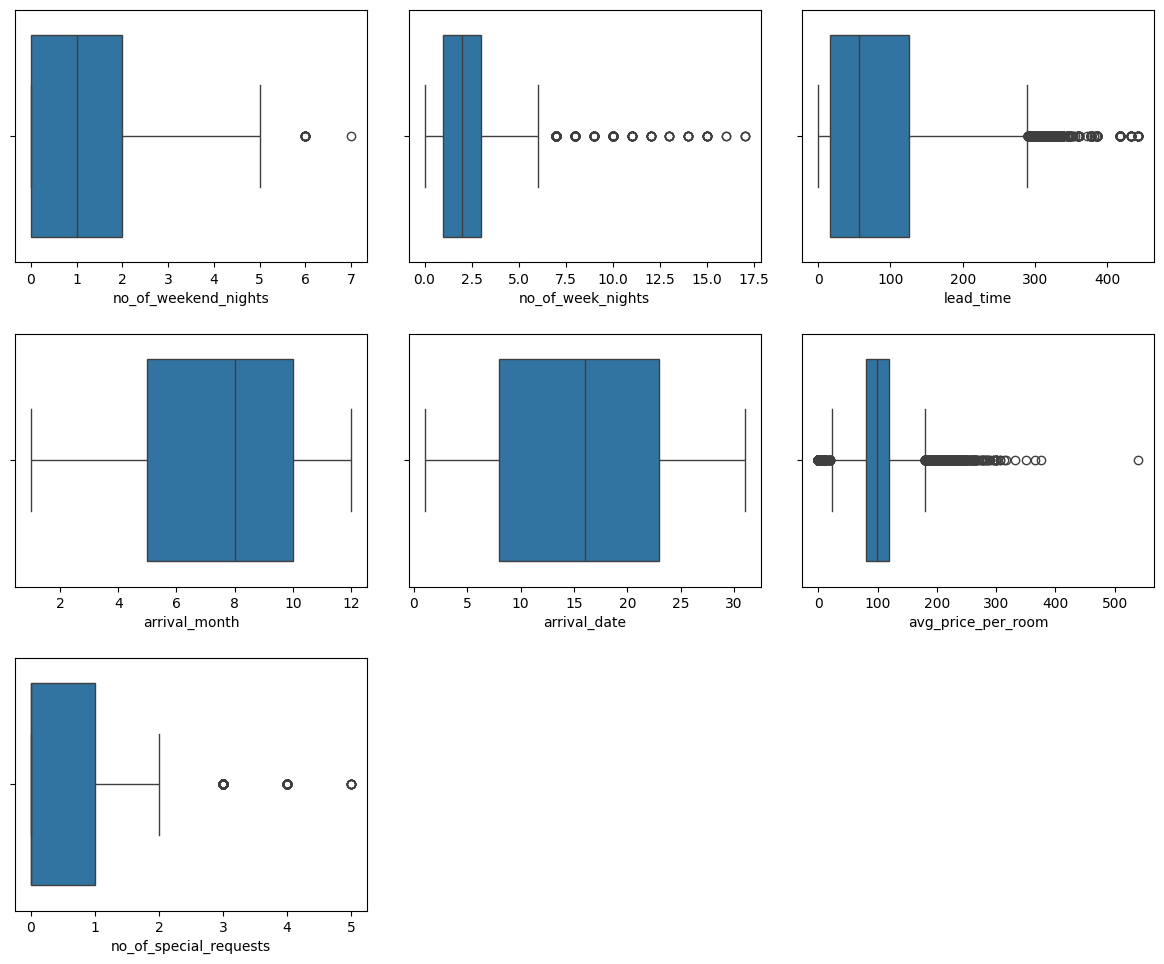

In [ ]:
# OUTLIER TREATMENT
num_cols = df[['no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_month', 'arrival_date', 'avg_price_per_room', 'no_of_special_requests']]
plt.figure(figsize=(12, 10))
for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)
plt.show()

**Observation:** As all the values are true we need not treat any of the outliers.

**FEATURE ENGINEERING**

- For time being I will combine the date, month and year columns. From this i can know whether the booking scheduled was on a weekday or weekend.
- With this information we can also see how weekdays and weekends affect cancelations respectively.
- Once we get to know whether the arrival date falls in weekday or weekend region we change the date into date, month and year form to understand demand based on seasonalities.

- By doing this it lead to dependency of columns, so I have removed it.

**DATA PREPARATION FOR MODELING**
- First lets change our predictor variable's output from canceled or not canceled to 0 and 1.
- **Canceled** as 1
- **Not canceled** as 0
- Then we will convert all the categorical columns into numerical columns using dummy variables.



In [ ]:
df['booking_status'] = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

In [ ]:
df['booking_status']

,booking_status
0,0
1,0
2,1
3,1
4,1
...,...
36270,0
36271,1
36272,0
36273,1


In [ ]:
df1 = df.copy()

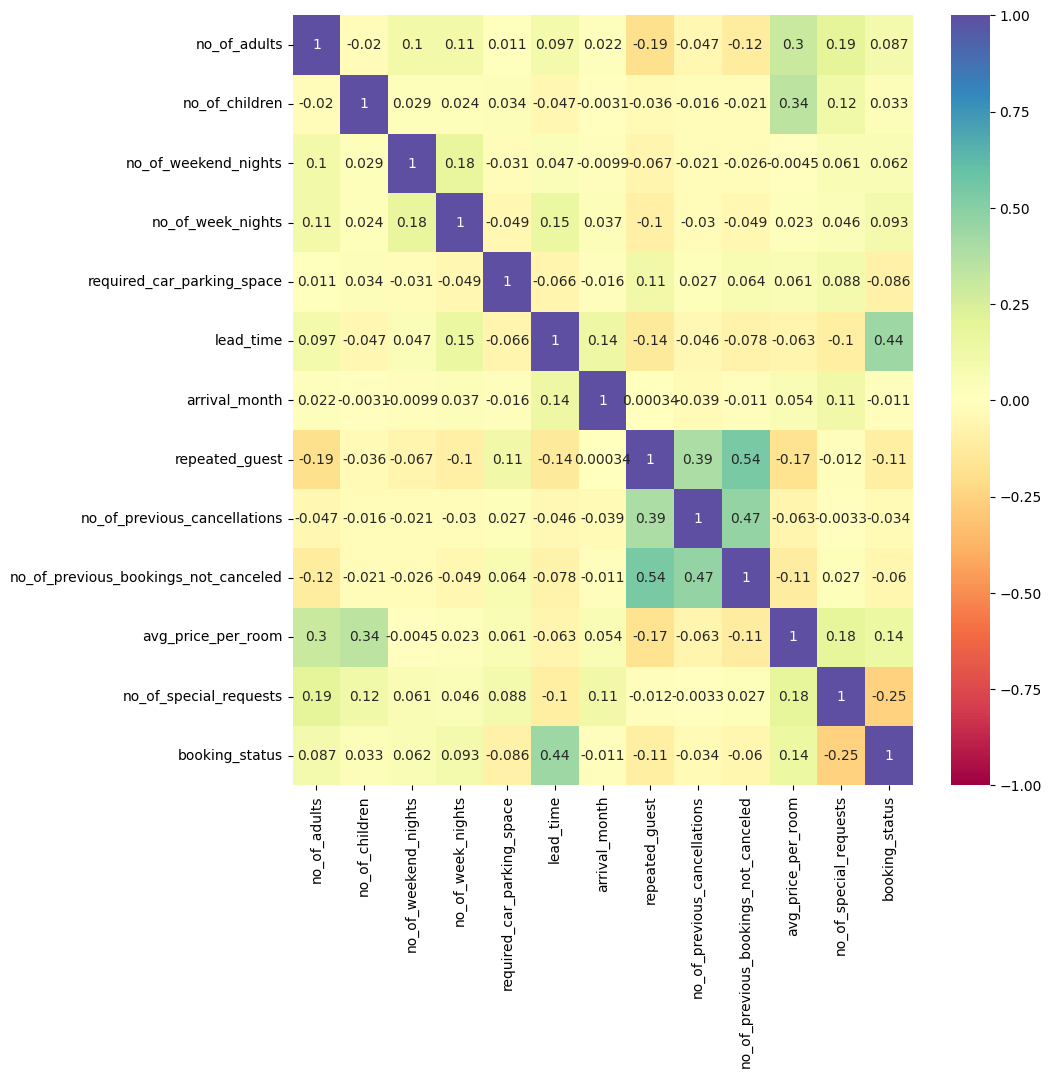

In [ ]:
# HEATMAP
num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']
cor1 = df1[num_cols].corr()
plt.figure(figsize = (10,10))
sns.heatmap(cor1, annot=True, vmin = -1, vmax = 1, cmap = 'Spectral');

In [ ]:
X = df.drop(['booking_status','Booking_ID','arrival_year','arrival_date'], axis = 1)
y = df['booking_status'].astype(float)

In [ ]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,Offline,0,0,0,65.00,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,Online,0,0,0,106.68,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,Online,0,0,0,60.00,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,Online,0,0,0,100.00,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,Online,0,0,0,94.50,0


In [ ]:
y.head()

,booking_status
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0


In [ ]:
# Introducing Dummy Variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)
X = X.astype(float)

In [ ]:
# Adding intercept to the data
X = sm.add_constant(X)

In [ ]:
X.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.0,2.0,0.0,1.0,2.0,0.0,224.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,2.0,0.0,2.0,3.0,0.0,5.0,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,2.0,0.0,0.0,2.0,0.0,211.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,2.0,0.0,1.0,1.0,0.0,48.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Splitting Data into Train and Test in the ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in training data:", X_train.shape[0])
print("Number of rows in testing data:", X_test.shape[0])

Number of rows in training data: 25392
Number of rows in testing data: 10883


### **MODEL BUILDING**

#### **LOGISTIC REGRESSION**

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

In [ ]:
# Fitting Logistic Regression Model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp = False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25366
Method:                           MLE   Df Model:                           25
Date:                Sat, 31 May 2025   Pseudo R-squ.:                  0.3274
Time:                        15:27:58   Log-Likelihood:                -10822.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.4279      0.262     -9.251      0.000      -2.942      -1.913
no_of_adults                             0.1012      

**Observations:**
- 32.74% of variation in the log-odds of the outcome compared to a baseline model.
- A positive coefficient means higher values of the variable are associated with a higher chance of cancelation.
- A negative coefficient means higher values of the variable are associated with a lower chance of cancelation.
- For example, if we consider lead time (+0.0163) we can say that people booking far in advance are more likely to cancel.
- For example, if we consider number of special requests (-1.4549) we can say that people with higher special requests are likely to not cancel.
- For example, if we consider market segment type we can say that corporate guests (-1.3068) are less likely to cancel compared to booking under aviation segment as it is our baseline.
- If we consider type of meal plan we can say that guests with no meal plan (+0.3442) are more likely to cancel compared to guests with meal plan 1 as it is our baseline.
- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(model, predictors, target, threshold=0.5):

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

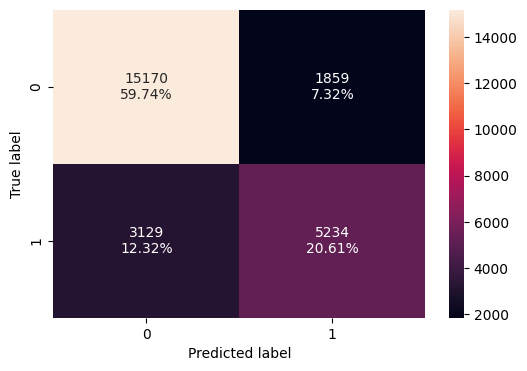

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
print("Training Performance")
Logistic_train_perf = model_performance_classification_statsmodels(lg, X_train, y_train)
Logistic_train_perf

Training Performance


,Accuracy,Recall,Precision,F1
0,0.80356,0.625852,0.737911,0.677277


**Observations:**
- The F1 score of the model is approximately 0.68 and we will try to maximize.
- This model might contain multicollinearity and columns with high p-values, we need to remove all these to get an optimal model.

In [ ]:
print("Test Performance")
Logistic_test_perf = model_performance_classification_statsmodels(lg, X_test, y_test)
Logistic_test_perf

Test Performance


,Accuracy,Recall,Precision,F1
0,0.804006,0.62862,0.728529,0.674897


#### **DECISION TREE CLASSIFIER**

In [ ]:
# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

Usual Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state = 1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**MODEL PERFORMANCE ON TRAIN DATA**

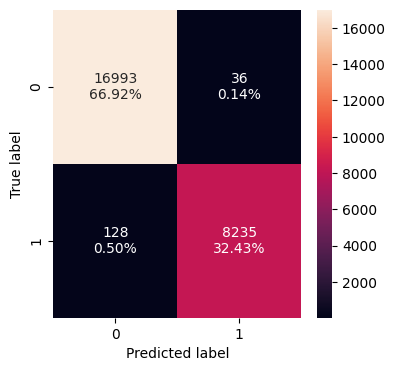

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

**Interpretation:**
- True Positives (8235): The model correctly identified 8235 bookings as canceled, which showcases strong performance in predicting the positive class cancelation.
- False Negatives (128): These are actual cancellations that the model failed to identify, incorrectly labeling them as not canceled. This is a key area to look moving forward to minimize errors.
- True Negatives (16993): The model accurately predicted 16993 bookings as not canceled, showing good reliability for the negative class.
- False Positives (36): Only 36 bookings were wrongly predicted as canceled when they were actually not canceled.

In [ ]:
train_model_perf = model_performance_classification(model, X_train, y_train)
train_model_perf

,Accuracy,Recall,Precision,F1
0,0.993541,0.984694,0.995647,0.990141


**MODEL PERFORMANCE ON TEST DATA**

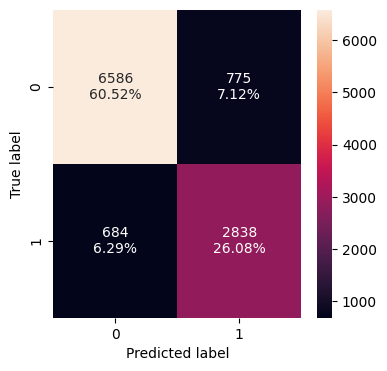

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

**Interpretation:**
- True Positives (2838): The model correctly identified 2838 bookings as canceled, which showcases strong performance in predicting the positive class cancelation.
- False Negatives (684): These are actual cancellations that the model failed to identify, incorrectly labeling them as not canceled.
- True Negatives (6586): The model accurately predicted 6586 bookings as not canceled.
- False Positives (775): 775 bookings were wrongly predicted as canceled when they were actually not canceled.

In [ ]:
test_model_perf = model_performance_classification(model, X_test, y_test)
test_model_perf

,Accuracy,Recall,Precision,F1
0,0.865938,0.805792,0.785497,0.795515


**Observations on original decision tree model:**
- accuracy, recall, precision and F1 score on train data set are 0.993541, 0.984694, 0.995647 and 0.990141 respectively.
- accuracy, recall, precision and F1 score on test data set are 0.865938, 0.805792, 0.785497 and 0.795515 respectively.
- The model is performing well on the training data but the drop in performance on the test data tells us overfitting has happened. To address this, we will explore pruning techniques and see if any of the pruning methods yields better results both performance wise and overall generalizability.

###**MODEL PERFORMANCE IMPROVEMENT**

#### **FOR LOGISTIC REGRESSION MODEL**

**Checking for multicollinearity**

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity


In [ ]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,326.126155
1,no_of_adults,1.346218
2,no_of_children,1.977318
3,no_of_weekend_nights,1.067308
4,no_of_week_nights,1.095319
5,required_car_parking_space,1.039705
6,lead_time,1.245920
7,arrival_month,1.051532
8,repeated_guest,1.780992
9,no_of_previous_cancellations,1.394492


**Observations:**
-


In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Pseudo R-squ.": adj_r2,
        }
    ).sort_values(by="Pseudo R-squ.", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["market_segment_type_Corporate", "market_segment_type_Offline", "market_segment_type_Online"]
res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Pseudo R-squ.
0,market_segment_type_Online,0.342969
1,market_segment_type_Corporate,0.342647
2,market_segment_type_Offline,0.341833


In [ ]:
col_to_drop = "market_segment_type_Offline"
X_train1 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test1 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train1)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  market_segment_type_Offline


,feature,VIF
0,const,34.312125
1,no_of_adults,1.330364
2,no_of_children,1.977006
3,no_of_weekend_nights,1.066194
4,no_of_week_nights,1.094408
5,required_car_parking_space,1.039443
6,lead_time,1.241321
7,arrival_month,1.051520
8,repeated_guest,1.777756
9,no_of_previous_cancellations,1.394292


- We have now dealt with multicollinearity in the data.
- Lets build the model using the updated set of independent variables.

In [ ]:
# Fitting Logistic Regression Model on new independent variables after no multi collinearity
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp = False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25367
Method:                           MLE   Df Model:                           24
Date:                Sat, 31 May 2025   Pseudo R-squ.:                  0.3255
Time:                        15:28:02   Log-Likelihood:                -10854.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -4.6687      0.109    -42.743      0.000      -4.883      -4.455
no_of_adults                             0.0753      

**Observations:**
- There is slight change in the pseudo R - squared value after removing multicollinearity which is 0.3255.
- We will now check for columns which have high p -value values as they are not significant in model building.

**Dealing with high p - value variables**

Instead of manually dropping a variable with p-value > 0.05 and then running the model and then choose another feature with p-value > 0.05 dropping it and continuing this process we can introduce a loop so that everything gets taken care.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

In [ ]:
# Dropping Type of meal plan Meal Plan 3 columns and checking for p values.
col_to_drop = ['type_of_meal_plan_Meal Plan 3']

X_train_reduced = X_train1.drop(columns=col_to_drop)
X_test_reduced = X_test1.drop(columns=col_to_drop)

# Fit logistic model again
logit_final = sm.Logit(y_train, X_train_reduced.astype(float))
model_final = logit_final.fit()

print(model_final.summary())


         Current function value: 0.427480
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25368
Method:                           MLE   Df Model:                           23
Date:                Sat, 31 May 2025   Pseudo R-squ.:                  0.3254
Time:                        15:28:03   Log-Likelihood:                -10855.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -4.6704      0.109    -42.759      0.000      -4.884

In [ ]:
# Dropping market segment type complementary and checking for p values.
col_to_drop1 = ['market_segment_type_Complementary']

X_train_reduced1 = X_train_reduced.drop(columns=col_to_drop1)
X_test_reduced1 = X_test_reduced.drop(columns=col_to_drop1)

# Fit logistic model again
logit_final1 = sm.Logit(y_train, X_train_reduced1.astype(float))
model_final1 = logit_final1.fit()

print(model_final1.summary())


Optimization terminated successfully.
         Current function value: 0.427622
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Sat, 31 May 2025   Pseudo R-squ.:                  0.3252
Time:                        15:28:03   Log-Likelihood:                -10858.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -4.6825      0.

In [ ]:
# Dropping number of previous bookings not canceled and checking for p values.
col_to_drop2 = ['no_of_previous_bookings_not_canceled']

X_train_reduced2 = X_train_reduced1.drop(columns=col_to_drop2)
X_test_reduced2 = X_test_reduced1.drop(columns=col_to_drop2)

# Fit logistic model again
logit_final2 = sm.Logit(y_train, X_train_reduced2.astype(float))
model_final2 = logit_final2.fit()

print(model_final2.summary())


Optimization terminated successfully.
         Current function value: 0.427673
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 31 May 2025   Pseudo R-squ.:                  0.3251
Time:                        15:28:04   Log-Likelihood:                -10859.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.6836      0.109    -42.946     

In [ ]:
# Dropping room type reserved Room type 3 and checking for p values.
col_to_drop3 = ['room_type_reserved_Room_Type 3']

X_train_reduced3 = X_train_reduced2.drop(columns=col_to_drop3)
X_test_reduced3 = X_test_reduced2.drop(columns=col_to_drop3)

# Fit logistic model again
logit_final3 = sm.Logit(y_train, X_train_reduced3.astype(float))
model_final3 = logit_final3.fit()

print(model_final3.summary())


Optimization terminated successfully.
         Current function value: 0.427673
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Sat, 31 May 2025   Pseudo R-squ.:                  0.3251
Time:                        15:28:04   Log-Likelihood:                -10859.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.6836      0.109    -42.946     

In [ ]:
# Dropping type of meal plan Meal Plan 3 and checking for p values.
col_to_drop4 = ['type_of_meal_plan_Meal Plan 2']

X_train_reduced4 = X_train_reduced3.drop(columns=col_to_drop4)
X_test_reduced4 = X_test_reduced3.drop(columns=col_to_drop4)

# Fit logistic model again
logit_final4= sm.Logit(y_train, X_train_reduced4.astype(float))
model_final4 = logit_final4.fit()

print(model_final4.summary())


Optimization terminated successfully.
         Current function value: 0.427677
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Sat, 31 May 2025   Pseudo R-squ.:                  0.3251
Time:                        15:28:04   Log-Likelihood:                -10860.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.6845      0.109    -42.962     

**Observations:**
- After eliminating the columns whose p -value is greater than 0.05 the pseudo r squared value is 0.3251.
- We can say that our model is performing equally well after removing few columns.
- By doing this we get a lean model which equally well explains the variation in the log-odds of the outcome.

**Coefficient Interpretations**
- Coefficient of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, no_of_previous_cancellations, avg_price_per_room, type_of_meal_plan_Not Selected, market_segment_type_Corporate and market_segment_type_Online are positive an increase in these will lead to increase in chances of cancelation.
- Coefficient of required_car_parking_space, repeated_guest, arrival_month, no_of_special_requests, room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4, room_type_reserved_Room_Type 5, room_type_reserved_Room_Type 6, room_type_reserved_Room_Type 7 are nehative an increase in these will lead to lower chances of cancelation.

**Converting coefficients to odds**
* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [ ]:
# converting coefficients to odds
odds = np.exp(model_final4.params)

# finding the percentage change
perc_change_odds = (np.exp(model_final4.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train_reduced4.columns)

,Odds,Change_odd%
const,0.009237,-99.076258
no_of_adults,1.080388,8.038791
no_of_children,1.171265,17.126547
no_of_weekend_nights,1.120305,12.030512
no_of_week_nights,1.046035,4.603480
required_car_parking_space,0.200822,-79.917821
lead_time,1.016228,1.622777
arrival_month,0.940575,-5.942506
repeated_guest,0.071740,-92.825969
no_of_previous_cancellations,1.245863,24.586342


**Coefficient Interpretations**
- Lets consider a column with positive change_odds% which is no_of_adults, holding all other variables constant, a 1-unit increase in the number of adults increases the odds of booking cancellation by ~8%.
- Lets consider a column with negative change_odds% which is no_of_special_requests, holding all else constant, a 1-unit increase in the number of special requests decreases the odds of booking cancellation by ~77%.

**LETS CHECK PERFORMANCE OF THE NEW MODEL**

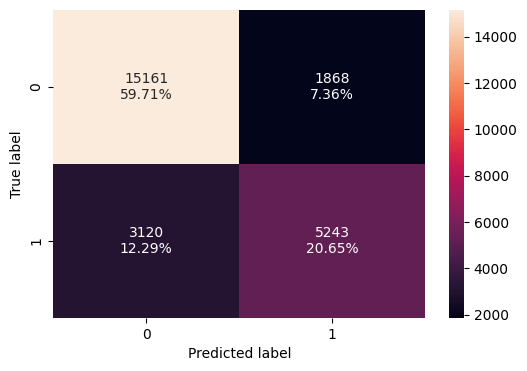

In [ ]:
# Confusion matrix for Train Data
confusion_matrix_statsmodels(model_final4, X_train_reduced4, y_train)

In [ ]:
# Model Performance
model_final4_perf_train = model_performance_classification_statsmodels(model_final4, X_train_reduced4, y_train)
print("Training Performance")
model_final4_perf_train

Training Performance


,Accuracy,Recall,Precision,F1
0,0.80356,0.626928,0.737308,0.677653


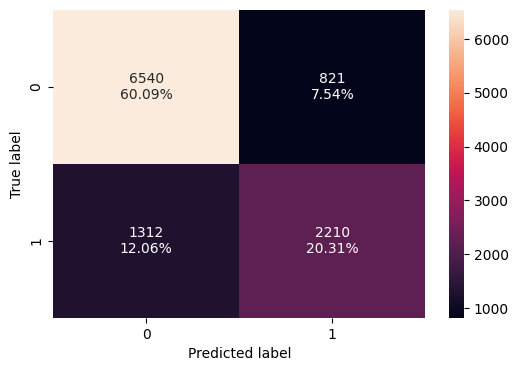

In [ ]:
# Confusion Matrix for Test Data
confusion_matrix_statsmodels(model_final4, X_test_reduced4, y_test)

In [ ]:
model_final4_perf_test = model_performance_classification_statsmodels(model_final4, X_test_reduced4, y_test)
print("Test Performance")
model_final4_perf_test

Test Performance


,Accuracy,Recall,Precision,F1
0,0.804006,0.627484,0.729132,0.6745


**Determining optimal threshold using ROC curve**
* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall.

Checking model performance on training data

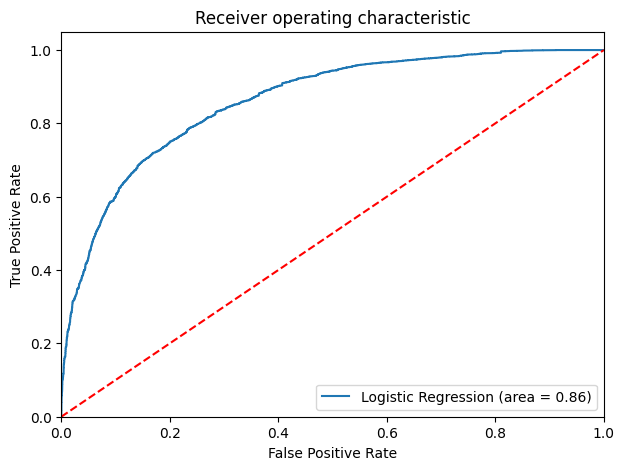

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, model_final4.predict(X_train_reduced4))
fpr, tpr, thresholds = roc_curve(y_train, model_final4.predict(X_train_reduced4))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, model_final4.predict(X_train_reduced4))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.31173151535859006


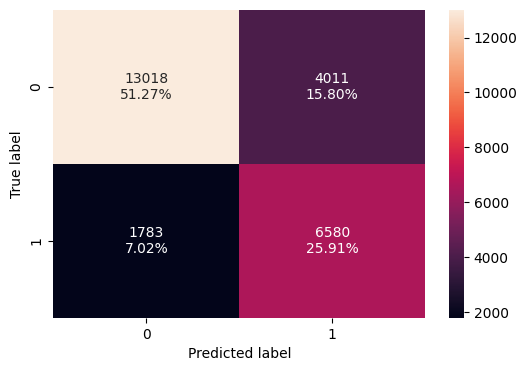

In [ ]:
# Confusion matrix of Training Data using the optimal threshold
confusion_matrix_statsmodels(model_final4, X_train_reduced4, y_train, threshold = optimal_threshold_auc_roc)

In [ ]:
# Model Performance
model_final4_perf_train_thre = model_performance_classification_statsmodels(model_final4, X_train_reduced4, y_train, threshold = optimal_threshold_auc_roc)
print("Training Performance")
model_final4_perf_train_thre

Training Performance


,Accuracy,Recall,Precision,F1
0,0.771818,0.786799,0.621282,0.694313


- Precision of model has decreased along with all other performance metrics.

Checking model performance on test data

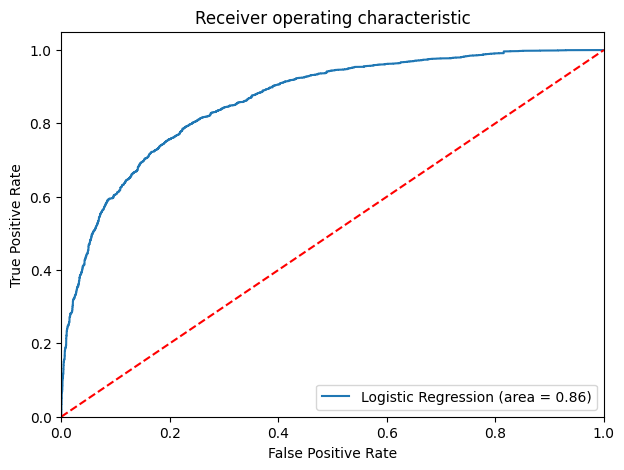

In [ ]:
logit_roc_auc_test = roc_auc_score(y_test, model_final4.predict(X_test_reduced4))
fpr, tpr, thresholds = roc_curve(y_test, model_final4.predict(X_test_reduced4))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

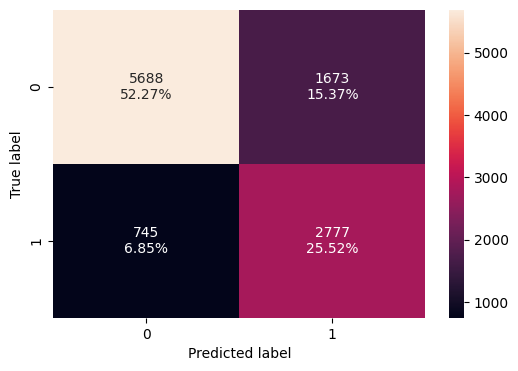

In [ ]:
# Confusion matrix for test data using optimal threshold
confusion_matrix_statsmodels(model_final4, X_test_reduced4, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# Model Performance
model_final4_perf_test_thre = model_performance_classification_statsmodels(model_final4, X_test_reduced4, y_test, threshold = optimal_threshold_auc_roc)
print("Test Performance")
model_final4_perf_test_thre

Test Performance


,Accuracy,Recall,Precision,F1
0,0.777819,0.788472,0.624045,0.696688


#### **FOR DECISION TREE**

Decision Tree with Class weights

- If the frequency of class A is 85% and the frequency of class B is 15% then class A will become the dominant and the decision tree will become biased toward the dominant class.
- We set class_weight = 'balanced', which will automatically adjusts the weights to be inversely proportional to the class frequencies in the input data.
- class_weight is a hyperparameter for the decision tree classifier.

In [ ]:
model_weight = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model_weight.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

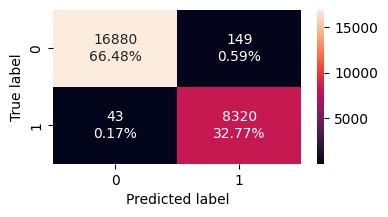

In [ ]:
# Performance on Train Data
confusion_matrix_sklearn(model_weight, X_train, y_train)

**Observations:**
-

In [ ]:
train_model_weight_perf = model_performance_classification(model_weight, X_train, y_train)
train_model_weight_perf

,Accuracy,Recall,Precision,F1
0,0.992439,0.994858,0.982406,0.988593


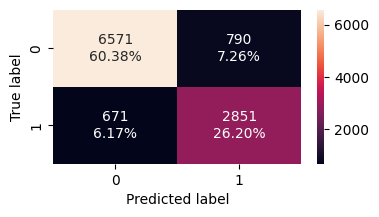

In [ ]:
# Performance on Test Data
confusion_matrix_sklearn(model_weight, X_test, y_test)

In [ ]:
test_model_weight_perf = model_performance_classification(model_weight, X_test, y_test)
test_model_weight_perf

,Accuracy,Recall,Precision,F1
0,0.865754,0.809483,0.783027,0.796035


Observation:
- Even after using decision tree with balanced weights we can see huge variation in perfromance of model on train data and test data which suggests that model is overfit.

#### **Decision Tree (Pre-Pruning)**

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
# Choose the type of classifer
estimator = DecisionTreeClassifier(random_state=1)
# Group of Parameters to choose from
parameters = {
    "class_weight": [None, 'balanced'],
    "max_depth": np.arange(10, 19, 2),
    "max_leaf_nodes": [80, 100, 120, 140],
    "min_samples_split": [100, 120, 140, 160],
}
acc_scorer = make_scorer(recall_score)
gridcv = GridSearchCV(estimator, parameters, scoring = acc_scorer, cv = 5)
gridcv = gridcv.fit(X_train, y_train)
estimator = gridcv.best_estimator_
estimator

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(10),
                       max_leaf_nodes=100, min_samples_split=100,
                       random_state=1)

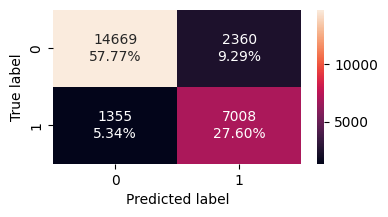

In [ ]:
# Confusion Matrix
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
# Performance on Train data
decision_tree_pre_perf_train = model_performance_classification(estimator, X_train, y_train)
decision_tree_pre_perf_train

,Accuracy,Recall,Precision,F1
0,0.853694,0.837977,0.748079,0.79048


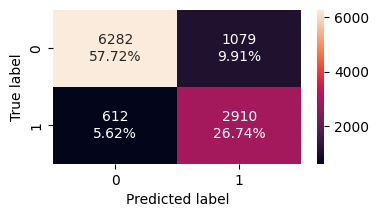

In [ ]:
# Confusion Matrx Test Data
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
# Performance on Test data
decision_tree_pre_perf_test = model_performance_classification(estimator, X_test, y_test)
decision_tree_pre_perf_test

,Accuracy,Recall,Precision,F1
0,0.84462,0.826235,0.729506,0.774864


**Observation:**
- The model is performing well both on train and test data unlike the usual decision tree model that we have first built.

In [ ]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

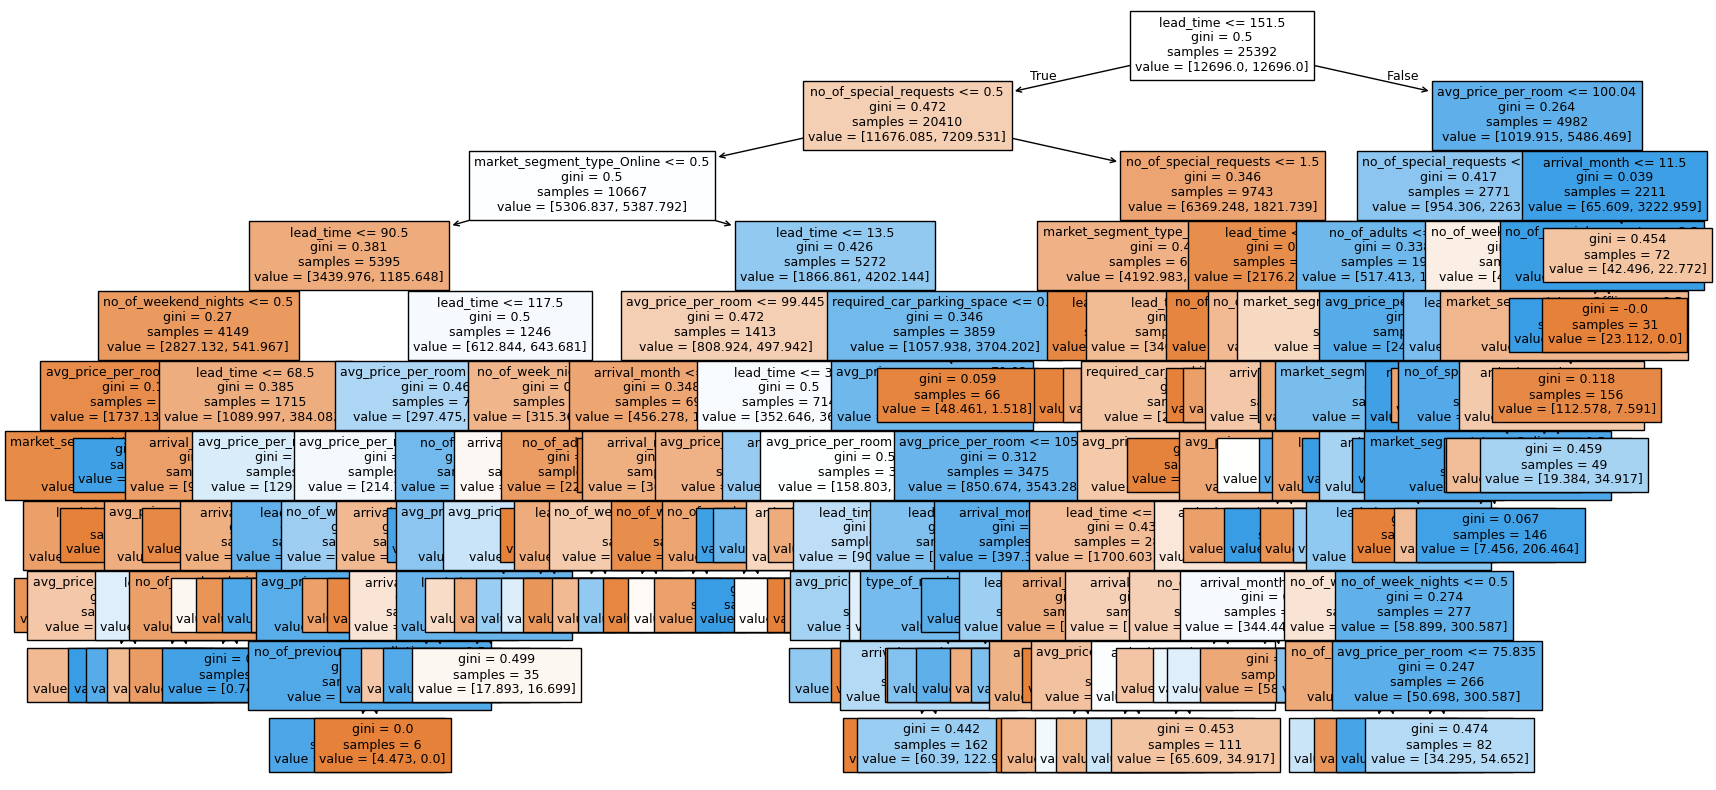

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

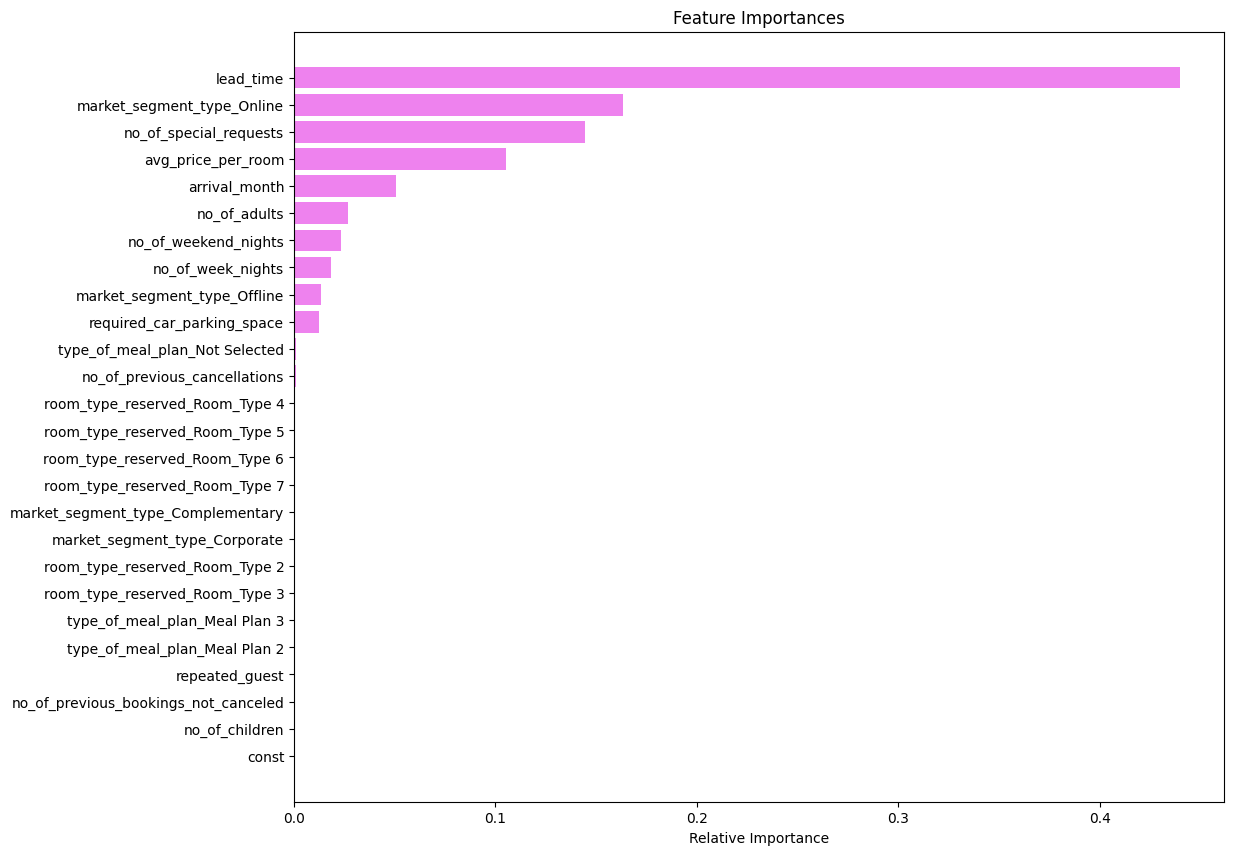

In [ ]:
# Important features during tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Obervation:**
- In the Pre truned tree, lead_time and market_segment_type_Online and no_of_special_requests are top three important features.

#### **Decision Tree(Post Pruning)**

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [ ]:
post = DecisionTreeClassifier(random_state=1, class_weight = 'balanced')
path = post.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.009130
1,2.933821e-20,0.009130
2,2.933821e-20,0.009130
3,2.933821e-20,0.009130
4,2.933821e-20,0.009130
...,...,...
1929,8.901596e-03,0.328058
1930,9.802243e-03,0.337860
1931,1.271875e-02,0.350579
1932,3.412090e-02,0.418821


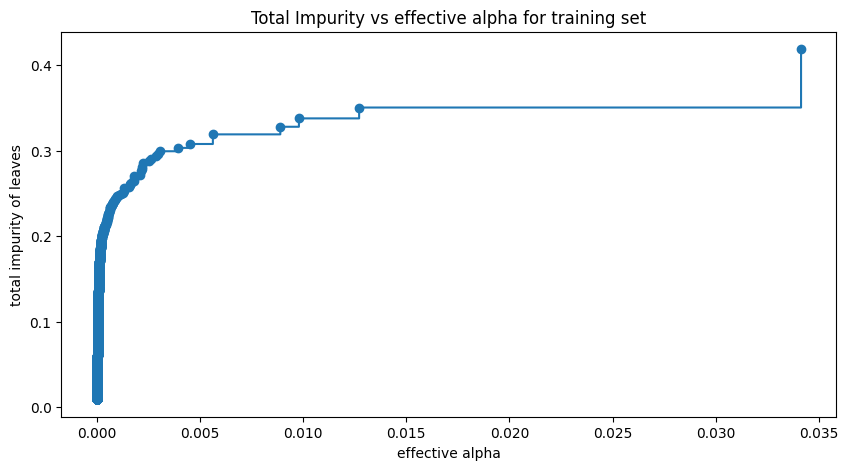

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Now we train a decision tree using the effective alphas.

In [ ]:
posts = []
for ccp_alpha in ccp_alphas:
    post = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    post.fit(X_train, y_train)
    posts.append(post)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        posts[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137099


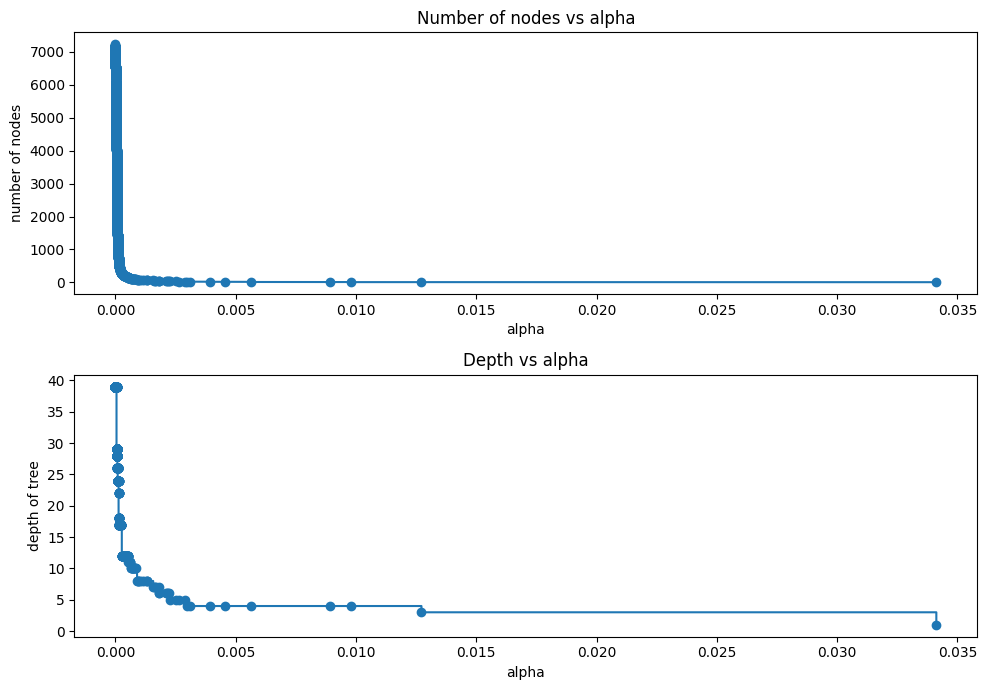

In [ ]:
# We now see how the number of nodes and tree depth decreases as aplha increases
posts = posts[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [post.tree_.node_count for post in posts]
depth = [post.tree_.max_depth for post in posts]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for post in posts:
    pred_train = post.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for post in posts:
    pred_test = post.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [post.score(X_train, y_train) for post in posts]
test_scores = [post.score(X_test, y_test) for post in posts]

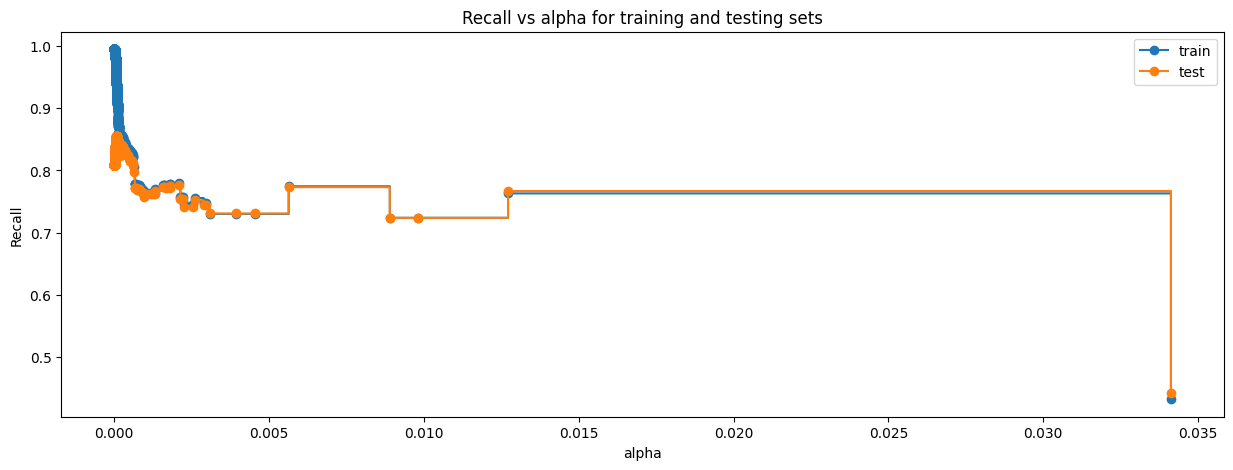

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# Creating the model with highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = posts[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(8.878160493914063e-05),
                       class_weight='balanced', random_state=1)


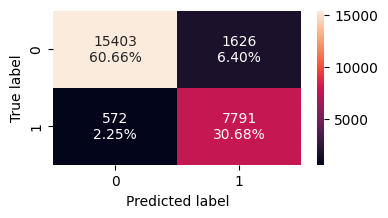

In [ ]:
# Confusion matrix for train data
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
# Model performance on train data
decision_tree_post_perf_train = model_performance_classification(best_model, X_train, y_train)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.913437,0.931603,0.827334,0.876378


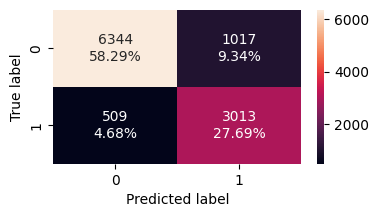

In [ ]:
# Confusion matrix for Test data
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
# Model performance on test data
decision_tree_post_perf_test = model_performance_classification(best_model, X_test, y_test)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.859781,0.85548,0.747643,0.797934


Observation:
- Post-pruning tree has performed well on training data and on test data. Training data has recall of 0.931603 and test data has recall of 0.85548.
- If we even consider the precision, it is better than the pre pruned decision tree.  

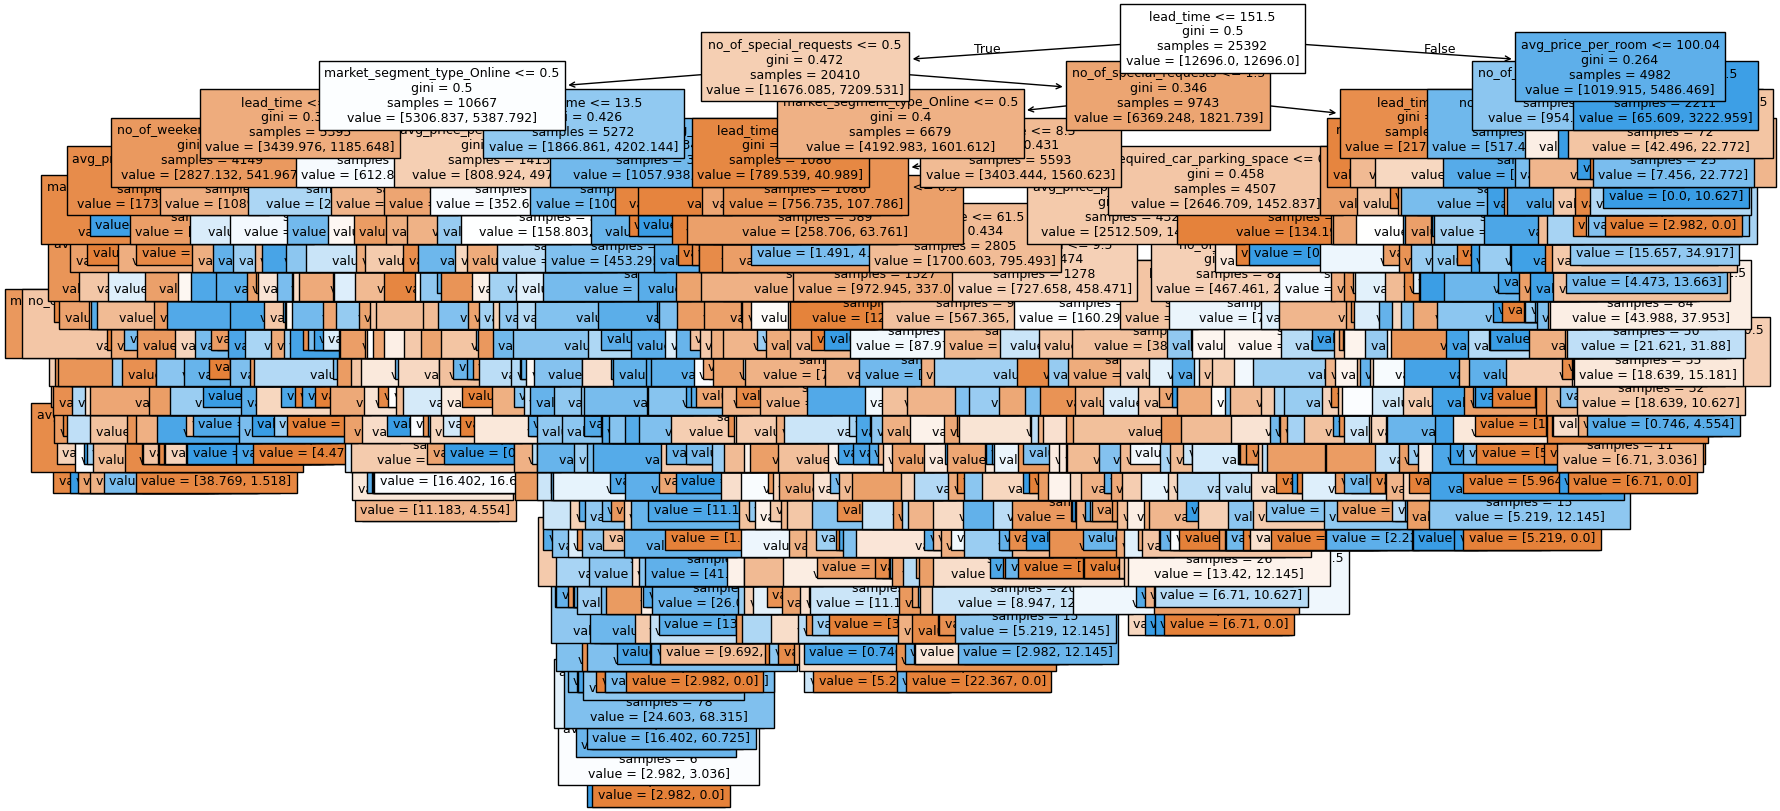

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

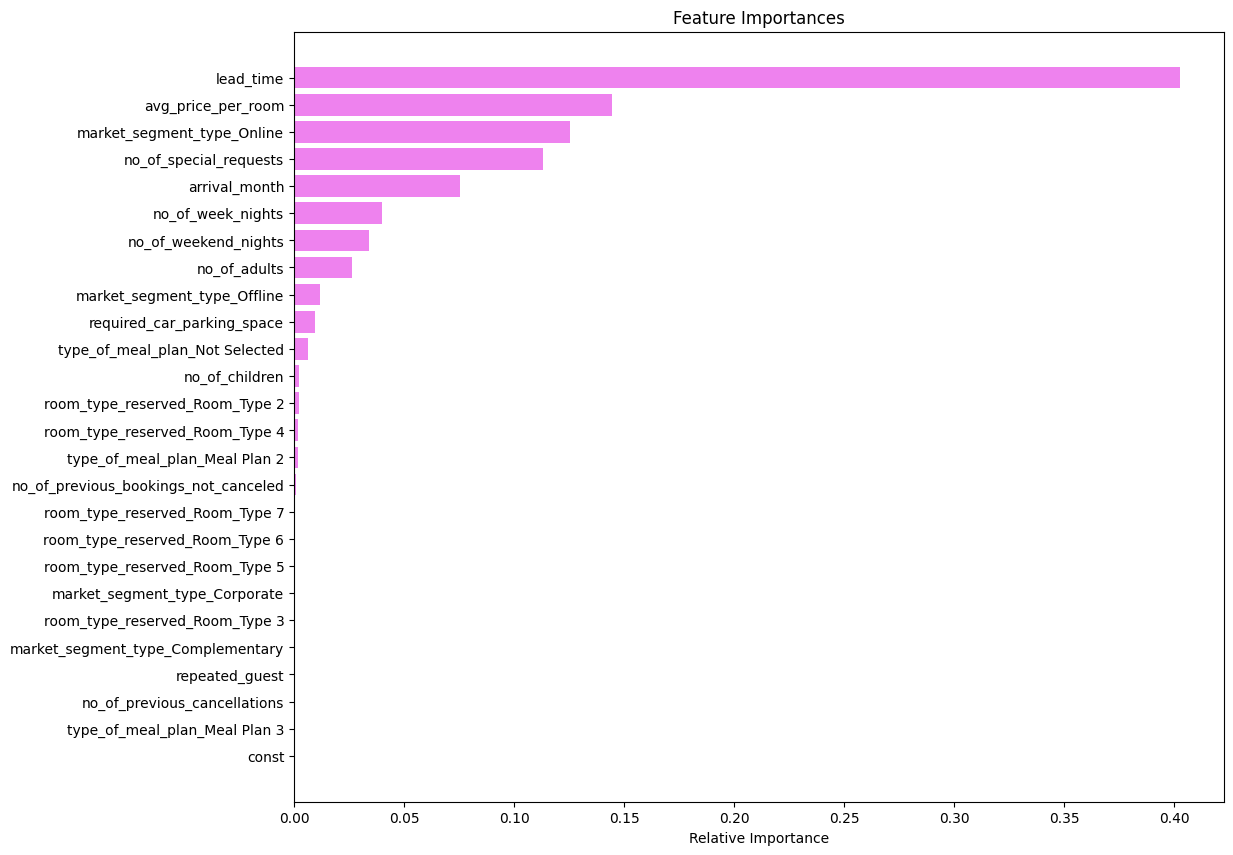

In [ ]:
plt.figure(figsize=(12, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Obervation:**
- In the Post truned tree, lead_time, avg_price_per_room and market_segment_type_Online are top three important features.

### **MODEL PERFORMANCE COMPARISON AND FINAL MODEL SELECTION**

In [ ]:
# PERFORMANCE OF TRAIN DATA
models_train_comp = pd.concat(
    [
        Logistic_train_perf.T,
        model_final4_perf_train.T,
        model_final4_perf_train_thre.T,
        train_model_perf.T,
        train_model_weight_perf.T,
        decision_tree_pre_perf_train.T,
        decision_tree_post_perf_train.T,
    ], axis = 1,
)

models_train_comp.columns = [
    "Usual Logistic Regression",
    "Logistic Regression after assumptions",
    "Logistic Regression with threshold",
    "Usual Decision Tree",
    "Decision Tree with class_weights",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp

Training performance comparison:


,Usual Logistic Regression,Logistic Regression after assumptions,Logistic Regression with threshold,Usual Decision Tree,Decision Tree with class_weights,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.803560,0.803560,0.771818,0.993541,0.992439,0.853694,0.913437
Recall,0.625852,0.626928,0.786799,0.984694,0.994858,0.837977,0.931603
Precision,0.737911,0.737308,0.621282,0.995647,0.982406,0.748079,0.827334
F1,0.677277,0.677653,0.694313,0.990141,0.988593,0.790480,0.876378


In [ ]:
# PERFORMANCE OF TEST DATA
models_test_comp = pd.concat(
    [
        Logistic_test_perf.T,
        model_final4_perf_test.T,
        model_final4_perf_test_thre.T,
        test_model_perf.T,
        test_model_weight_perf.T,
        decision_tree_pre_perf_test.T,
        decision_tree_post_perf_test.T,
    ], axis = 1,
)

models_test_comp.columns = [
    "Usual Logistic Regression",
    "Logistic Regression after assumptions",
    "Logistic Regression with threshold",
    "Usual Decision Tree",
    "Decision Tree with class_weights",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp

Testing performance comparison:


,Usual Logistic Regression,Logistic Regression after assumptions,Logistic Regression with threshold,Usual Decision Tree,Decision Tree with class_weights,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.804006,0.804006,0.777819,0.865938,0.865754,0.844620,0.859781
Recall,0.628620,0.627484,0.788472,0.805792,0.809483,0.826235,0.855480
Precision,0.728529,0.729132,0.624045,0.785497,0.783027,0.729506,0.747643
F1,0.674897,0.674500,0.696688,0.795515,0.796035,0.774864,0.797934


**Observations:**
- Out of all the models, Decision Tree with Post Pruning has given the best performance on both train and test data with precision of 0.931603 and 0.855480 on train and test data respectively.
- All the other models have shown overfitting on train data and very poor performance on test data.
- Also, the decision tree with post pruning has shown better genralizability overall. Our real goal was to identify as many real cancellations as possible which means our false negatives should be minimum or our recall should be maximum.

### **ACTIONABLE INSIGHTS AND RECOMMENDATIONS**

**Observations:**
- The model demonstrates strong recall (~85%) on test data, meaning it can successfully identify most actual cancelations.

- This allows the operations team to proactively respond to likely cancelations — e.g., reallocate rooms, manage overbooking strategies, or offer incentives to at-risk customers to reduce cancelations.

- Our priority was minimizing false negatives (missed cancelations), and the selected post-pruned decision tree performs best on this front.

- The model highlights key features that influence cancelations:

- - Lead time – longer lead times correlate with higher cancelation risk.

- - Market segment type – bookings made via online channels tend to have higher cancelation rates.

- - Number of special requests – more requests often indicate committed guests, and thus a lower likelihood of cancelation.



**Recommendations:**

**1) Proactive Room Allocation:**

- Use the model’s predictions to identify likely cancelations early and release those rooms for other bookings, especially during high-demand periods.

**2) Targeted Customer Engagement:**

- For high-risk bookings (e.g., high lead time, online source, no special requests), initiate retention strategies like confirmation reminders or incentives for staying.

**3) Operational Dashboard:**

- Integrate model outputs into a real-time dashboard for hotel staff to view daily/weekly expected cancellations and plan accordingly.

**4) Continuous Monitoring and Retraining:**

- Schedule periodic retraining of the model (e.g., quarterly) to account for seasonal trends, marketing campaigns, or changes in booking behavior.

**5) Feature-Specific Policy Changes:**

- Consider requiring confirmation steps for online bookings with long lead times and zero special requests to reduce cancelations.